# 3. Coordinate Systems and Axes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.pylab as pylab
import calendar
import random
random.seed(42)

## Cartesian coordinates

Figure 3-1. Standard Cartesian coordinate system.The horizontal axis is conventionally called x and the vertical axis y.The two axes form a grid with equidistant spacing. Here, both the x and y grid lines are seperated by units of one.


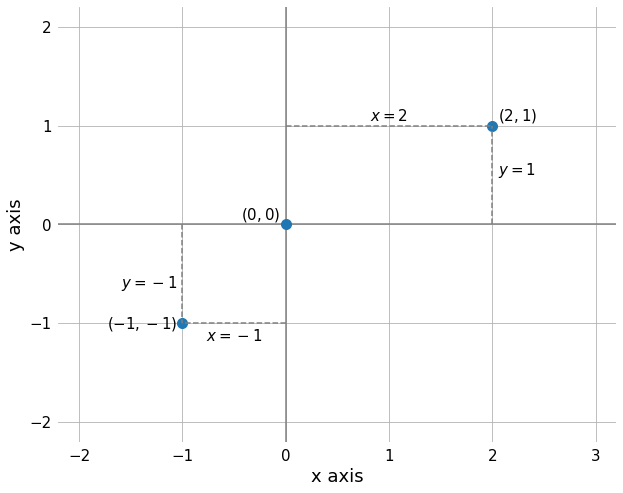

In [2]:
params = {'axes.labelsize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          }
text_size = 15

pylab.rcParams.update(params)

ax = plt.figure(figsize=(10,8)).gca()

plt.plot([-2.2,3.2],[0,0], '-', color='gray')
plt.plot([0,0], [-2.2,2.2], '-', color='gray')
plt.plot([0,2,-1], [0,1,-1], 'o', markersize=10)
plt.text(2.05, 1.05, '$(2,1)$', fontsize=text_size)
plt.text(-0.05, 0.05, '$(0,0)$', fontsize=text_size, ha='right')
plt.text(-1.05, -1.05, '$(-1,-1)$', fontsize=text_size, ha='right')

plt.plot([0,2], [1,1], '--', color='gray')
plt.text(1, 1.05, '$x=2$', fontsize=text_size, ha='center')
plt.plot([2,2],[0,1], '--', color='gray')
plt.text(2.05, 0.5, '$y=1$', fontsize=text_size)

plt.plot([0,-1], [-1,-1], '--', color='gray')
plt.text(-0.5, -1.05, '$x=-1$', fontsize=text_size, va='top', ha='center')
plt.plot([-1,-1],[0,-1], '--', color='gray')
plt.text(-1.05, -0.5, '$y=-1$', fontsize=text_size, va='top', ha='right')

plt.xlim(-2.2,3.2)
plt.ylim(-2.2,2.2)
plt.grid(True)

plt.xlabel('x axis')
plt.ylabel('y axis')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# Set borders off: https://stackoverflow.com/a/28720127/11524628
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
print('Figure 3-1. Standard Cartesian coordinate system.' +  
      'The horizontal axis is conventionally called x and the vertical axis y.' + 
      'The two axes form a grid with equidistant spacing. Here, both the x and y grid lines are seperated by units of one.')

In [3]:
# Load data
df = pd.read_csv("../data/resources/ncdc_normals.tsv",sep="\t")
df['location'] = df['station_id'].map({
    "USW00014819": 'Chicago',
    "USW00093107": 'San Francisco',
    "USW00012918": 'Houston',
    "USC00042319": 'Death Valley',
})
df.dropna(inplace=True)
df.sort_values(by=["month", "day"],inplace=True)
df = df[['month', 'day', 'location', 'station_id', 'temperature']]
df.reset_index(drop=True,inplace=True)
df['temperature'] = df['temperature'].astype(int)
houston = df[df['location']=='Houston']

# Create Houston temparature df
houston_temp = pd.DataFrame(houston.groupby('month')['temperature'].mean())
houston_temp.reset_index(inplace=True)
houston_temp['month'] = houston_temp['month'].map(lambda x: calendar.month_abbr[x])
houston_temp.loc[12, :] = ['Jan', houston_temp.loc[0, 'temperature']]
houston_temp

,month,temperature
0,Jan,53.419355
1,Feb,56.931034
2,Mar,62.935484
3,Apr,69.400000
4,May,76.580645
5,Jun,81.566667
6,Jul,83.354839
7,Aug,83.774194
8,Sep,79.600000
9,Oct,71.709677


Figure 3-2. Daily temperature normals for Houston, TX. Temperature is mpped to the y axis and day of the year to the x axis. Parts (a), (b), and (c) show the same figure in different aspect ratios.


/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


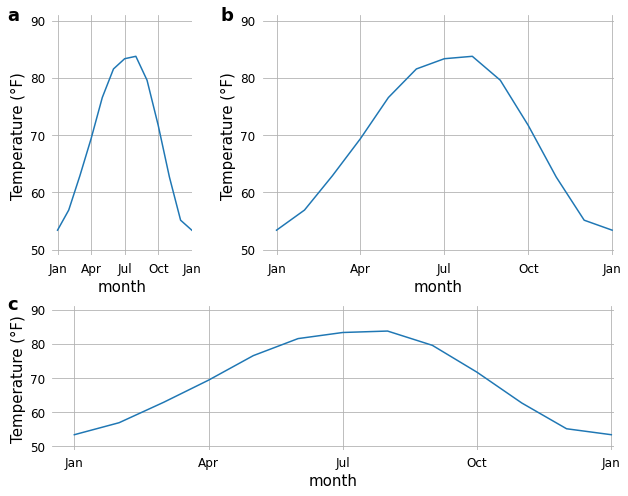

In [4]:
params = {'axes.labelsize': 15,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          }

pylab.rcParams.update(params)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
spec = fig.add_gridspec(nrows=5, ncols=3, left=0.05, right=0.7, hspace=1.1, wspace=0.5)

ax0 = fig.add_subplot(spec[0:3, 0])
ax0.text(-4.5, 90, 'a', fontsize=18, weight='bold')
ax1 = fig.add_subplot(spec[0:3, 1:])
ax1.text(-2, 90, 'b', fontsize=18, weight='bold')
ax2 = fig.add_subplot(spec[3:, :])
ax2.text(-1.5, 90, 'c', fontsize=18, weight='bold')

axes = [ax0, ax1, ax2]

for ax in axes:
    ax.plot(houston_temp.index, houston_temp['temperature'], '-')
    ax.set_ylabel('Temperature (°F)')
    ax.set_xlabel('month')
    ax.grid(True)
    
    ax.set_xlim(-0.5, 12.05)
    ax.set_xticks(np.arange(0, 13, 3))
    ax.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct', 'Jan'])
    ax.set_ylim([49, 91])
    ax.set_yticks(np.arange(50, 91, 10))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
    
print('Figure 3-2. Daily temperature normals for Houston, TX.' +
      ' Temperature is mpped to the y axis and day of the year to the x axis.' + 
      ' Parts (a), (b), and (c) show the same figure in different aspect ratios.')

In [5]:
# Houston against San Francisco
houston_sanfranc = df[df.location.isin(['Houston', 'San Francisco'])]
houston_vs_sanfranc = houston_sanfranc.groupby(['month', 'location'])['temperature'].mean().unstack()
houston_vs_sanfranc.loc[13,:] = houston_vs_sanfranc.loc[1,:]
houston_vs_sanfranc

location,Houston,San Francisco
month,,
1,53.419355,55.483871
2,56.931034,56.000000
3,62.935484,56.967742
4,69.400000,59.433333
5,76.580645,62.774194
6,81.566667,66.100000
7,83.354839,70.580645
8,83.774194,72.000000
9,79.600000,70.333333


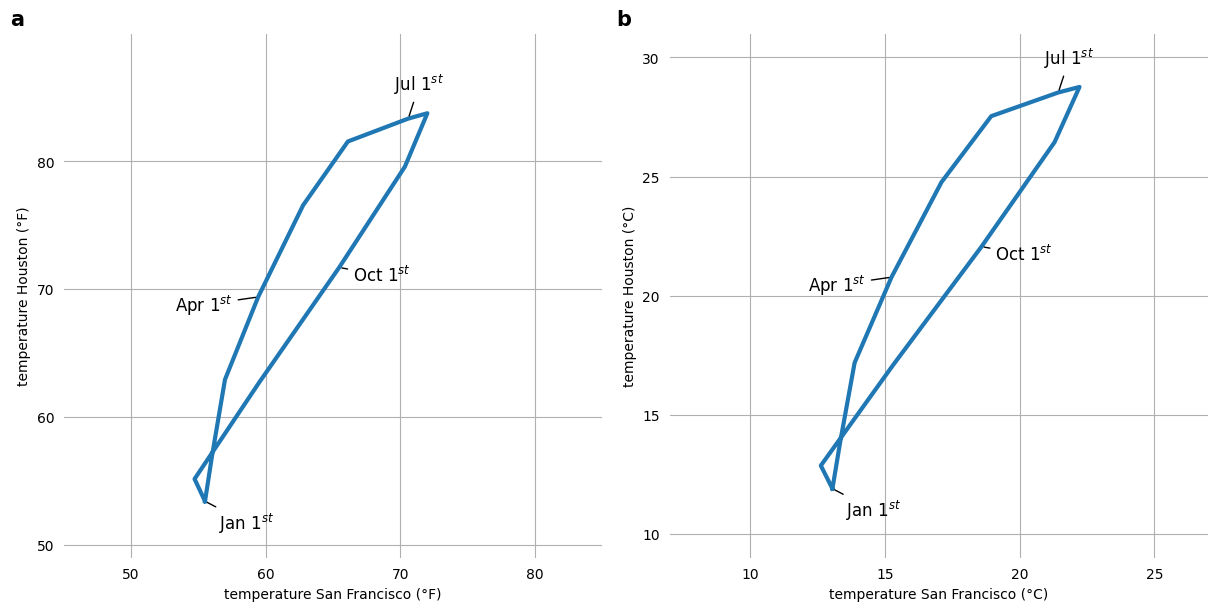

In [403]:
linewidth = 3
txt_size=12

fig = plt.figure(figsize=(12, 6), constrained_layout=True)
spec = fig.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.7)

ax0 = fig.add_subplot(spec[0, 0])
ax0.plot(houston_vs_sanfranc['San Francisco'].to_list(), houston_vs_sanfranc['Houston'].to_list(), '-', linewidth=linewidth)
ax0.set_ylabel('temperature Houston (°F)')
ax0.set_xlabel('temperature San Francisco (°F)')
ax0.set_ylim([49, 90])
ax0.set_yticks(np.arange(50, 81, 10))
ax0.set_xlim([45, 85])
ax0.set_xticks(np.arange(50, 81, 10))
ax0.set_title('a', loc='left', x=-0.1, fontsize=15, weight='bold')

ax1 = fig.add_subplot(spec[0, 1])
ax1.plot((houston_vs_sanfranc['San Francisco'] - 32)/1.8, 
         (houston_vs_sanfranc['Houston'] - 32)/1.8, 
         '-', linewidth=linewidth)
ax1.set_ylabel('temperature Houston (°C)')
ax1.set_xlabel('temperature San Francisco (°C)')
ax1.set_ylim([9, 31])
ax1.set_yticks(np.arange(10,31,5))
ax1.set_xlim([7, 27])
ax1.set_xticks(np.arange(10,26,5))
ax1.set_title('b', loc='left', x=-0.1, fontsize=15, weight='bold')

# Annotations
idice = [1, 4, 7, 10]
texts = ['Jan $1^{st}$', 'Apr $1^{st}$', 'Jul $1^{st}$', 'Oct $1^{st}$']
xytexts = [(10, -20), (-60, -10), (-10, 20), (10, -10)]

for idx, txt, xytext in zip(idice, texts, xytexts):
    ax0.annotate(txt, xy=(houston_vs_sanfranc['San Francisco'][idx], houston_vs_sanfranc['Houston'][idx]), 
                 xytext=xytext, textcoords='offset points', 
                 arrowprops=dict(arrowstyle="-"),
                 fontsize=txt_size)
    
    ax1.annotate(txt, xy=((houston_vs_sanfranc['San Francisco'][idx]-32)/1.8, (houston_vs_sanfranc['Houston'][idx]-32)/1.8), 
                 xytext=xytext,
                 arrowprops=dict(arrowstyle="-"),
                 textcoords='offset points', fontsize=txt_size)

axes = [ax0, ax1]

for ax in axes:
    ax.grid(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)

In [389]:
transf = ax0.transData.inverted()
bb = plt.figure().get_window_extent(renderer = plt.figure().canvas.get_renderer())
bb_datacoords = bb.transformed(transf)
points = bb_datacoords.get_points()
x_lim = points[0][0]
y_lim = points[1][1]
x_lim, y_lim

(41.208369415630735, 82.84142479562149)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Text(-2.285919434635361, -1.4628571428571444, 'Horizontal Bars')

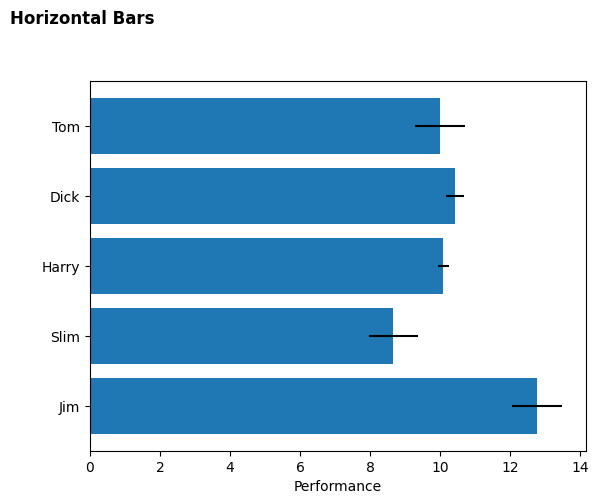

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [386]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')

# Get min x and max y
# get the inverse of the transformation from data coordinates to pixels
transf = ax.transData.inverted()
bb = plt.figure().get_window_extent(renderer = plt.figure().canvas.get_renderer())
bb_datacoords = bb.transformed(transf)
points = bb_datacoords.get_points()
x_lim = points[0][0]
y_lim = points[1][1]

ax.text(x=x_lim, y=y_lim, s="Horizontal Bars", weight="bold", fontsize=12) # <- Use text instead of title

Figure 3-3. Daily temperature normals for Houston, TX, plotted versus the respective temperature normals of San Diego, CA. The first days of the months January, April, July, and October are highlighted to provide a temporal reference.

## Nonlinear axes

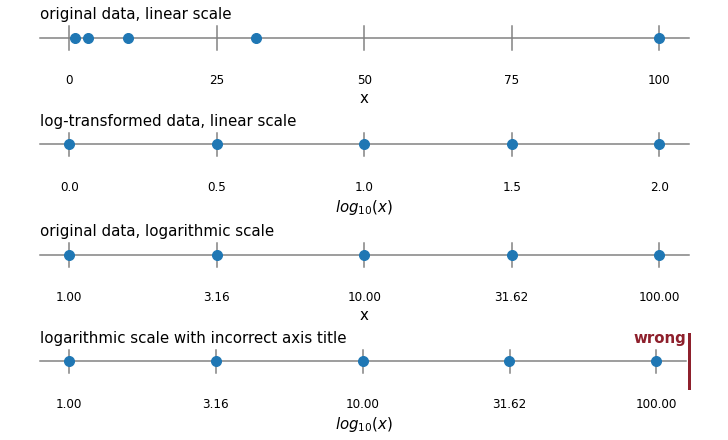

In [7]:
params = {'axes.labelsize': 15,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'axes.titlesize': 15,
          'axes.titlepad': 10,
          }

pylab.rcParams.update(params)

xs = [1, 3.16, 10, 31.6, 100]

fig, axes = plt.subplots(4,1, figsize=(10, 6), constrained_layout=True)

i = 0
axes[i].plot([-5, 105], [0, 0], '-', color='gray')
tick_locs = [0, 25, 50, 75, 100]
axes[i].set_xticks(tick_locs)
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot(xs, [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('x')
axes[i].text(-5, 0.7, 'original data, linear scale', 
             ha='left', va='bottom', fontsize=15)

i = 1
axes[i].plot([-0.1, 2.1], [0, 0], '-', color='gray')
tick_locs = [0.0, 0.5, 1.0, 1.5, 2.0]
axes[i].set_xticks(tick_locs)
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot([np.log10(x) for x in xs], [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('$log_{10}(x)$')
axes[i].text(-0.1, 0.7, 'log-transformed data, linear scale', 
             ha='left', va='bottom', fontsize=15)

i = 2
axes[i].plot([-0.1, 2.1], [0, 0], '-', color='gray')
tick_locs = [0.0, 0.5, 1.0, 1.5, 2.0]
axes[i].set_xticks(tick_locs)
axes[i].set_xticklabels(['{:.2f}'.format(10**x) for x in tick_locs])
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot([np.log10(x) for x in xs], [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('x')
axes[i].text(-0.1, 0.7, 'original data, logarithmic scale', 
             ha='left', va='bottom', fontsize=15)

i = 3
axes[i].plot([-0.1, 2.1], [0, 0], '-', color='gray')
tick_locs = [0.0, 0.5, 1.0, 1.5, 2.0]
axes[i].set_xticks(tick_locs)
axes[i].set_xticklabels(['{:.2f}'.format(10**x) for x in tick_locs])
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot([np.log10(x) for x in xs], [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('$log_{10}(x)$')
axes[i].text(-0.1, 0.7, 'logarithmic scale with incorrect axis title', 
             ha='left', va='bottom', fontsize=15)
axes[i].plot([2.11, 2.11], [-1.2,1.2], '-', color='#8E202C', linewidth=3)
axes[i].text(2.1, 0.7, 'wrong', fontweight='bold', fontsize=15, va='bottom', ha='right', color='#8E202C')

for ax in axes:
    ax.set_ylim([-1.2, 1.2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

Relationship between linear and logarithmic scales. The dots correspond to the data values 1, 3.16, 10, 31.6, and 100, which are evenly spaced numbers on a logarithmic scale. We can display these data points on a linear scale, we can log-transform them and then show them on a linear scale, or we can show them on a logarithmic scale. Importantly, the correct axis title for a logarithmic scale is the name of the variable shown, not the logarithm of that variable.

In [8]:
df = pd.read_csv('../data/resources/US_census.tsv', sep='\t')
texas = df[df.state == 'Texas']
texas['norm_pop2010'] = texas.pop2010 / texas.pop2010.median()
texas.sort_values('norm_pop2010', ascending=False, inplace=True)
texas.reset_index(drop=True, inplace=True)
texas.name = texas.name.str.replace(' County', '')
texas

/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,state,name,FIPS,pop2010,pop2000,age_under_5,age_under_18,age_over_65,female,white,...,manufacturer_shipments_2007,mercent_whole_sales_2007,sales,sales_per_capita,accommodation_food_service,building_permits,fed_spending,area,density,norm_pop2010
0,Texas,Harris,48201.0,4092459.0,3400578.0,8.2,28.0,8.1,50.2,56.6,...,169275136.0,205478751.0,51899053.0,13276.0,7874724.0,15039.0,29940175.0,1703.48,2402.4,222.646156
1,Texas,Dallas,48113.0,2368139.0,2218899.0,8.1,27.6,8.8,50.6,53.5,...,39047030.0,58165146.0,33177208.0,13929.0,5705137.0,5485.0,17621936.0,871.28,2718.0,128.836244
2,Texas,Tarrant,48439.0,1809034.0,1446219.0,7.9,28.0,8.9,51.0,66.6,...,43337529.0,25801512.0,24931407.0,14582.0,3763516.0,5089.0,8195152.0,863.61,2094.7,98.418693
3,Texas,Bexar,48029.0,1714773.0,1392931.0,7.6,27.1,10.3,51.0,72.9,...,12305089.0,12232098.0,22815281.0,14359.0,3829048.0,4653.0,19444429.0,1239.82,1383.1,93.290517
4,Texas,Travis,48453.0,1024266.0,812280.0,7.4,23.9,7.3,49.6,69.3,...,28294664.0,14119812.0,13879471.0,14302.0,2833744.0,4397.0,16949198.0,990.20,1034.4,55.724172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Texas,McMullen,48311.0,707.0,851.0,4.0,16.8,26.4,48.1,90.9,...,0.0,0.0,NaN,NaN,NaN,0.0,7201.0,1139.43,0.6,0.038464
250,Texas,Borden,48033.0,641.0,729.0,4.4,21.5,20.7,47.7,93.6,...,0.0,0.0,NaN,NaN,0.0,0.0,5881.0,897.44,0.7,0.034873
251,Texas,Kenedy,48261.0,416.0,414.0,6.5,24.5,14.2,49.0,87.5,...,0.0,0.0,0.0,0.0,0.0,0.0,4012.0,1458.33,0.3,0.022632
252,Texas,King,48269.0,286.0,356.0,3.8,23.8,13.3,50.7,93.7,...,0.0,0.0,0.0,0.0,0.0,0.0,6722.0,910.87,0.3,0.015560


### Log scales
* frequently used when the dataset contains numbers of very different magnitudes. Ex: for the Texas counties shown in Figures 3-5 and 3-6, the most populous one (Haris) had 4,092,459 inhabitants in the 2010 US Census while the least populous one (Loving) had 82. --> Log scale would also be appropriate even if we hadn't divided the population numbers by their median to turn them to ratios.

Text(0, 0.5, 'population number/median')

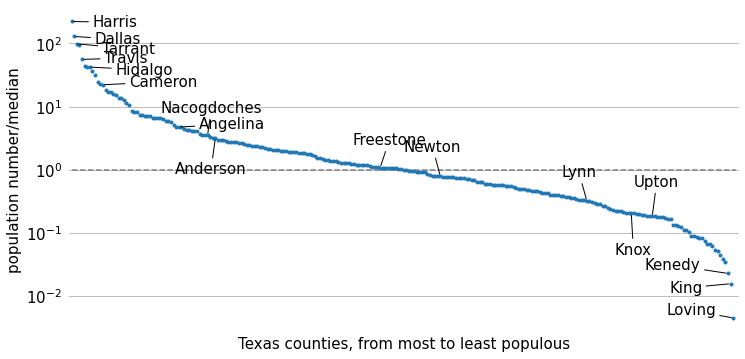

In [9]:
random.seed(42)
txt_size = 15
params = {'axes.labelsize': 15,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlesize': 15,
          'axes.titlepad': 10,
          'ytick.minor.size': 0,
          'ytick.minor.width': 0
          }

pylab.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_yscale('log')
ax.plot([0,len(texas)], [1, 1], '--', color='gray')
ax.plot(range(0,len(texas)), texas.norm_pop2010.values, 'o', markersize=3)

county_idx = sorted(list(range(0,3)) 
                    + list(range(len(texas)-3, len(texas)))
                    + list(random.sample(range(4, sum(texas.norm_pop2010 > 10)), 3))
                    + list(random.sample(range(sum(texas.norm_pop2010 > 10)+1, sum(texas.norm_pop2010 > 1)), 4))
                    + list(random.sample(range(sum(texas.norm_pop2010 > 1)+1, sum(texas.norm_pop2010 > 0.1)), 4))
                    )

xytexts = []
has = []
vas = []

for i in county_idx:
    if i < 50:
        xytexts.append((random.uniform(20, 30), random.uniform(-5,5)))
        has.append('left')
        vas.append('center')
        
    elif i > len(texas) - 30:
        xytexts.append((random.uniform(-30, -10), random.uniform(-10,10)))
        has.append('right')
        vas.append('center')
    
    else:
        xytext = (random.uniform(-10, 10), random.choice(list(range(-30,-20)) + list(range(20,30))))
        xytexts.append(xytext)
        has.append('center')
        if xytext[1] < 0:
            vas.append('top')
        else:
            vas.append('bottom')
        
for i, xytext, va, ha in zip(county_idx, xytexts, vas, has):
    ax.annotate(texas.name[i], xy=(i, texas.norm_pop2010.values[i]),
                 xytext=xytext, textcoords='offset points', ha=ha, va=va,
                 arrowprops=dict(arrowstyle="-"),
                 fontsize=txt_size)
    
ax.set_xlim([-1, len(texas)+1])
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

plt.xlabel("Texas counties, from most to least populous")
plt.ylabel('population number/median')


Figure 3-5. Population numbers of Texas counties relative to their median value. Select countries are highlighted by namw. The dashed line indicates a ratio of 1, corresponding to a county with median population number. The most populous counties have approximately 100 times more inhabitants than the median county, and the least populous counties have approximately 100 times fewer inhabitants than the median county.

Text(0, 0.5, 'population number/median')

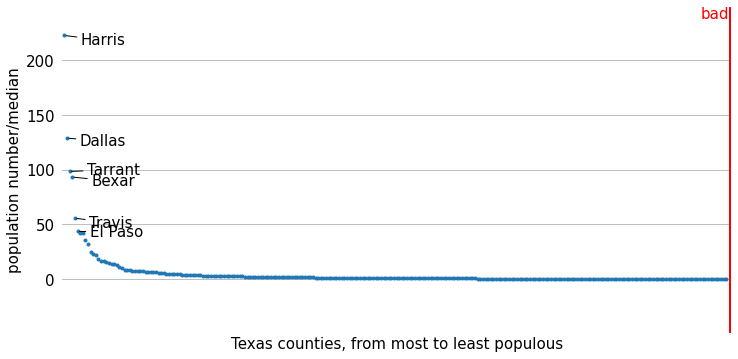

In [10]:
random.seed(42)
txt_size = 15
params = {'axes.labelsize': 15,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlesize': 15,
          'axes.titlepad': 10,
          'ytick.minor.size': 0,
          'ytick.minor.width': 0
          }

pylab.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range(0,len(texas)), texas.norm_pop2010.values, 'o', markersize=3)

# display countries
county_idx = list(range(0,6))
xytexts = []
has = []
vas = []

for i in county_idx:
    xytexts.append((random.uniform(10,20), random.uniform(-5,5)))
    has.append('left')
    vas.append('center')
    
for i, xytext, va, ha in zip(county_idx, xytexts, vas, has):
    ax.annotate(texas.name[i], xy=(i, texas.norm_pop2010.values[i]),
                 xytext=xytext, textcoords='offset points', ha=ha, va=va,
                 arrowprops=dict(arrowstyle="-"),
                 fontsize=txt_size)
    
# The red line
plt.plot([len(texas)+1, len(texas)+1], [-50, 250], '-', color='red', linewidth=5)
plt.text(len(texas), 249, 'bad', fontsize=txt_size, va="top", ha="right", color='red')

ax.set_xlim([-1, len(texas)+1])
ax.set_ylim([-49,249])

ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

plt.xlabel("Texas counties, from most to least populous")
plt.ylabel('population number/median')

Figure 3-6. Population sizes of Texas countries relative to their median value. By displaying a ratio on a linear scale, we have overemphasized ratios > 1 and have obscured ratios < 1. As a general rule, ratios should not be displayed on a linear scale.

But what if there was a county with 0 inhabitants? This county could not be shown on the logarithm scale, because it would lie at $-\infty$ --> another kind of scale: *square-root scale*

### Square-root scale
* compressing larger numbers into a smaller range like log scale, but it allows for the presence of 0.

/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


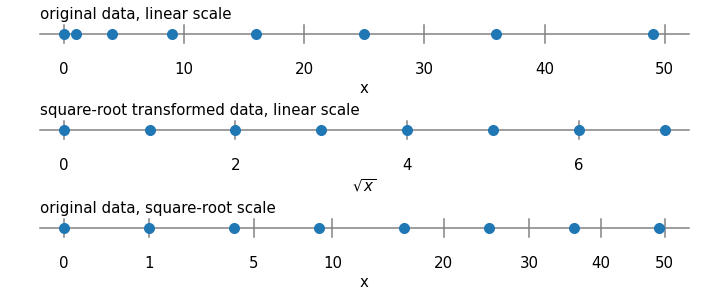

In [11]:
from cmath import sqrt


xs = [0, 1, 4, 9, 16, 25, 36, 49]

fig, axes = plt.subplots(3,1, figsize=(10, 4), constrained_layout=True)

i = 0
axes[i].plot([-2, 52], [0, 0], '-', color='gray')
tick_locs = range(0,51,10)
axes[i].set_xticks(tick_locs)
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot(xs, [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('x')
axes[i].text(-2, 0.7, 'original data, linear scale', 
             ha='left', va='bottom', fontsize=15)

i = 1
axes[i].plot([-14/50, 7 + 14/50], [0, 0], '-', color='gray')
tick_locs = range(0,7,2)
axes[i].set_xticks(tick_locs)
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot([sqrt(x) for x in xs], [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('$\sqrt{x}$')
axes[i].text(-14/50, 0.7, 'square-root transformed data, linear scale', 
             ha='left', va='bottom', fontsize=15)

i = 2
axes[i].plot([-2/np.sqrt(50), np.sqrt(50)+2/np.sqrt(50)], [0, 0], '-', color='gray')
xticklabels = [0, 1, 5, 10, 20, 30, 40, 50]
tick_locs = np.sqrt(xticklabels)
axes[i].set_xticks(tick_locs)
axes[i].set_xticklabels(xticklabels)
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot([sqrt(x) for x in xs], [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('x')
axes[i].text(-2/np.sqrt(50), 0.7, 'original data, square-root scale', 
             ha='left', va='bottom', fontsize=15)

for ax in axes:
    ax.set_ylim([-1.2, 1.2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

Figure 3-7. Relationship between linear and square-root scales. The dots correspond to the data values 0, 1, 4, 9, 16, 25, 36, and 49, which are evenly placed numbers on a square-root scale, since they are the squares of the integers from 0 to 7. We can display these data points on a linear scale, we can square-root-transform them and then show them on a linear scale, or we can show them on a square-root scale.

* **Problems**:
  * while on a linear scale one unit step corresponds to addition or substraction of a constant value, and on a log scale it corresponds to multiplication with or division by a constant value, no such rule exists for a square-root scale. The meaning of a unit step on a square-root scale depends on the scale value at which we're starting.
  * It is unclear how to best place axis ticks on a square-root scale. To obtain evenly space ticks, we would have to place them at squares, but axis ticks at, for example, positions 0, 4, 25, 39, and 81 (every second square) would be unintuitive. Alternatively, we could place them at linear intervals (10,20,30, etc.) but this would result in either too few axis ticks near the low end of the scale or too many near the high end.

* **Aplications**:
  * natural scale for data coming in squares. Ex: the context of geographic regions, if we show the areas of geographic regions on a square-root scale, we are highlighting the regions' linear extent from east to west or north to south.

In [12]:
df = pd.read_csv('../data/resources/US_census.tsv', sep='\t')
us_region_df = pd.read_csv('../data/resources/US_regions.tsv', sep='\t')
df['state_abr'] = df['state'].map(us_region_df.set_index('state').to_dict()['state_abr'])
state_area = df.groupby('state_abr').sum()['area']
selected_states = ["NY", "PA", 'ME', 'MA', 'VT', 'NH', 'NJ', 'CT', 'RI']
state_area = state_area[state_area.index.isin(selected_states)]
state_area = state_area.sort_values(ascending=False)
state_area

state_abr
NY    47126.43
PA    44742.71
ME    30842.92
VT     9216.67
NH     8952.66
MA     7800.08
NJ     7354.22
CT     4842.36
RI     1033.82
Name: area, dtype: float64

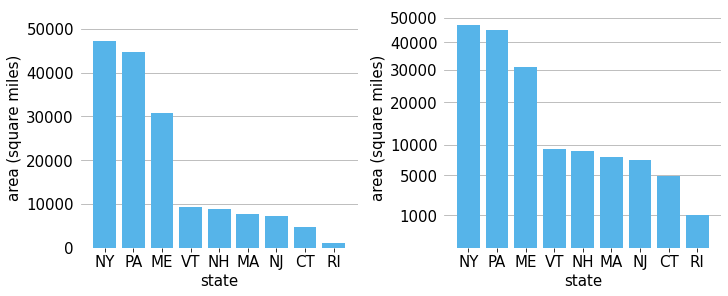

In [13]:
# plot
fig, axes = plt.subplots(1,2, figsize=(10, 4), constrained_layout=True)

i=0
axes[i].bar(state_area.index, state_area.values, color='#56B4E9')
axes[i].set_ylim([0, 55000])

i=1
axes[i].bar(state_area.index, np.sqrt(state_area.values), color='#56B4E9')
axes[i].set_ylim([0, np.sqrt(55000)])
yticklabels = [1000, 5000, 10000, 20000, 30000, 40000, 50000]
tick_locs = np.sqrt(yticklabels)
axes[i].set_yticks(tick_locs)
axes[i].set_yticklabels(yticklabels)

for ax in axes:
    ax.set_xlabel('state')
    ax.set_ylabel('area (square miles)')
    ax.set_axisbelow(True)
    ax.yaxis.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
    


## Coordinate Systems with Curved Axes

* The axes are curved: in the polar coordinate system, we specify positions via an angle and a radial distance from the origin, and therefore the angle axis is circular.
* **Aplication**:
  * data of a periodic nature: data values at one end of the scale can be logically joined to data values at the other end (ex: the days in a year). In matplotlib, this kind is called polar plot: https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html
  * the context of geospatial data, i.e., maps.

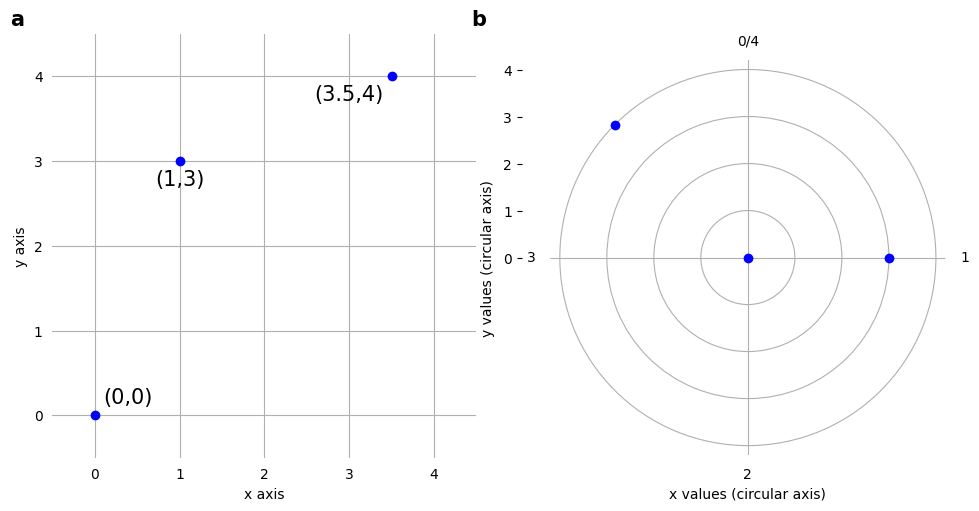

In [501]:
from matplotlib import projections


ann_fontsize = 15
xlabelpad = 10
ylabelpad = 40

fig, axes = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True)

i=0
axes[i].set_title('a',loc='left', x=-0.1, fontsize=ann_fontsize, fontweight='bold')
axes[i].set_aspect('equal')
axes[i].set_xlim([-0.5, 4.5])
axes[i].set_ylim([-0.5, 4.5])
axes[i].set_axisbelow(True)
axes[i].yaxis.grid(True)
axes[i].xaxis.grid(True)
axes[i].set_xlabel('x axis')
axes[i].set_ylabel('y axis')
axes[i].tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
axes[i].plot([0, 1, 3.5], [0, 3, 4], "o", color='blue')
axes[i].text(0.1, 0.1, '(0,0)', ha='left', va='bottom', fontsize=ann_fontsize)
axes[i].text(1, 2.9, '(1,3)', ha='center', va='top', fontsize=ann_fontsize)
axes[i].text(3.4, 3.9, '(3.5,4)', ha='right', va='top', fontsize=ann_fontsize)
axes[i].spines['top'].set_visible(False)
axes[i].spines['right'].set_visible(False)
axes[i].spines['bottom'].set_visible(False)
axes[i].spines['left'].set_visible(False)

i = 1
axes[i] = plt.subplot(122, projection='polar')
axes[i].set_title('b',loc='left', x=-0.2, fontsize=ann_fontsize, fontweight='bold')
# Set 0 at top and go clockwise: https://www.tutorialspoint.com/how-to-make-the-angles-in-a-matplotlib-polar-plot-go-clockwise-with-0-at-the-top#:~:text=To%20set%20polar%20plot%20clockwise,theta)%20on%20the%20current%20axis.
axes[i].set_theta_direction(-1)
axes[i].set_theta_offset(np.pi / 2.0)
# set labels
axes[i].set_xlabel('x values (circular axis)')
axes[i].set_ylabel('y values (circular axis)', labelpad=ylabelpad)
# plot
axes[i].plot([0, 1*np.pi/2, 3.5*np.pi/2], [0, 3, 4], "o", color='blue')
# set ticks
axes[i].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
axes[i].set_xticklabels(['0/4', '1', '2', '3'])
axes[i].set_yticks([0, 1, 2, 3, 4])
axes[i].set_yticklabels([])
axes[i].set_ylim([0, 4.2])
# turn off the border
axes[i].spines['polar'].set_visible(False) # https://stackoverflow.com/a/70375269/11524628
l, b, w, h = axes[i].get_position(True).bounds
# add cartesian axes
new_ax = fig.add_axes([l*0.97, b, w, h], frameon=False)
new_ax.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=False)
new_ax.set_ylim([-4.1, 4.1])
new_ax.set_yticks(range(0, 5));

Figure 3-9. Relationship between Cartesian and polar coordinates. (a) Three data points shown in a Cartesian coordinate system. (b) The same three data points shown in a polar coordinate system. We have taken the x coordinates from part (a) and used them as angular coordinates and the y coordinates from part (a) and used them as radial coordinates. The circular axis runs from 0 to 4 in this example, and therefore x = 0 and x = 4 are the same locations in this coordinate system.

In [314]:
# Load temperature data
df = pd.read_csv("../data/resources/ncdc_normals.tsv",sep="\t")
df['location'] = df['station_id'].map({
    "USW00014819": 'Chicago',
    "USW00093107": 'San Francisco',
    "USW00012918": 'Houston',
    "USC00042319": 'Death Valley',
})
df.dropna(inplace=True)
df.sort_values(by=["month", "day"],inplace=True)
df = df[['month', 'day', 'location', 'station_id', 'temperature']]
df.reset_index(drop=True,inplace=True)
df['temperature'] = df['temperature'].astype(int)
df = df.groupby(['location', 'month']).mean()[['temperature']]
df.loc['Chicago',:]
df


,temperature
month,
1,24.354839
2,28.448276
3,38.387097
4,50.000000
5,60.483871
6,70.600000
7,75.451613
8,73.741935
9,65.933333


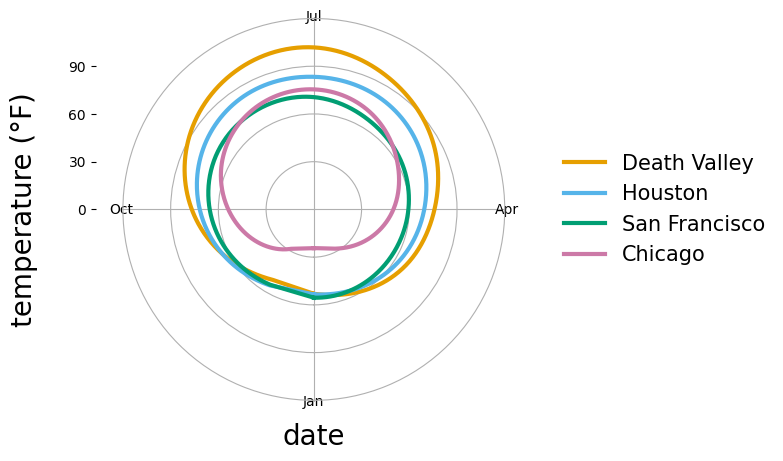

In [515]:
from scipy.interpolate import make_interp_spline, BSpline

ann_fontsize = 15
label_fs = 20
xlabelpad = 10
ylabelpad = 60
linewidth=3

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(projection='polar'))
# Set direction for polar
ax.set_theta_direction(1)
ax.set_theta_offset(-np.pi / 2.0)

# set axis labels
ax.set_xlabel('date', labelpad=xlabelpad, fontsize=label_fs)
ax.set_ylabel('temperature (°F)', labelpad=ylabelpad, fontsize=label_fs)

# plot
locations = ["Death Valley", "Houston", "San Francisco", "Chicago"]
colors = ["#E69F00", "#56B4E9", "#019E73", "#CC79A7"]
for loc, color in zip(locations, colors):
    # loc_df = df[df.location==loc].sort_values(by=['adj_month'])
    loc_df = df.loc[loc, :]
    x = (loc_df.index.values-1)/3*np.pi/2
    y = loc_df['temperature'].values
    X_Y_Spline = make_interp_spline(x, y)
    smooth_x = np.linspace(x.min(), x.max(), 500)
    smooth_y = X_Y_Spline(smooth_x)
    ax.plot(list(smooth_x) + [smooth_x[0]], list(smooth_y) + [smooth_y[0]], 
            color=color, 
            label=loc, 
            linewidth=linewidth)

# set up ticks
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct'], y=0.1)
ax.set_yticks(range(0,121,30))
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
ax.set_ylim([0,121])

# legend
ax.legend(loc='center left', bbox_to_anchor=(1.1,0.5),
          fontsize=ann_fontsize,
          frameon=False)

# Add new axes for cartesian axis
l, b, w, h = ax.get_position().bounds
new_ax = fig.add_axes([l*0.92, b, w, h], frameon=False)
new_ax.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=False)
new_ax.set_ylim(-121, 121)
new_ax.set_yticks(range(0,91,30));

Figure 3-10. Daily temperature normals for four selected locations in the US, shown in polar coordinates. The radial distance from the center point indicates the daily temperature in Fahrenheit, and the days of the year are arranged counterclockwise starting with Jan. 1st at the 6:00 position.

/home/hnguyent/miniconda3/envs/dataviz/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


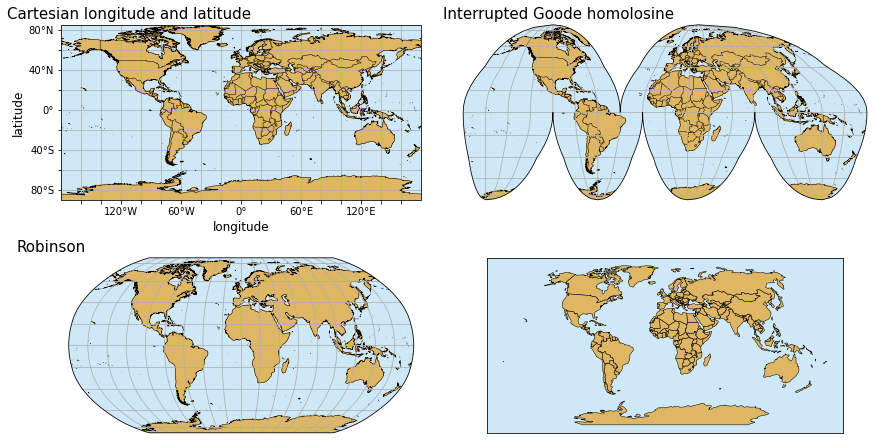

In [134]:
import geopandas as gpd
import contextily as cx
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

titlesize=15
labelsize = 12
ticksize = 10
lw = 0.5
linecolor = 'black'

df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, axes = plt.subplots(2,2, figsize=(12,6), constrained_layout=True)

# Cartesian longitude/latitude axes
axes[0,0] = plt.subplot(221, projection=ccrs.PlateCarree())
axes[0,0].coastlines(resolution='50m', color=linecolor, linewidth=lw)
axes[0,0].add_feature(cfeature.LAND, facecolor='#DFB663')
axes[0,0].add_feature(cfeature.BORDERS, facecolor='black', linewidth=0.5)
# df.plot(ax=axes[0,0], color='#DFB663', edgecolor='black', linewidth=1)
axes[0,0].set_facecolor('#CFE8F8')
axes[0,0].set_xlabel('longitude', fontsize=labelsize)
axes[0,0].set_ylabel('latitude', fontsize=labelsize)
axes[0,0].set_xticks(range(-160, 180, 20))
axes[0,0].set_xticklabels([""]*2 + ['120°W'] + [""]*2 + ['60°W'] + [""]*2 + ['0°'] + [""]*2 + ['60°E'] + [""]*2 + ['120°E'] + [""]*2, 
                          fontsize=ticksize)
axes[0,0].set_yticks(range(-80, 81, 20))
axes[0,0].set_yticklabels(["80°S", "", "40°S", "", "0°", "", "40°N", "", "80°N"], fontsize=ticksize)
axes[0,0].set_ylim([-90, 85])
axes[0,0].set_xlim([-180, 180])
axes[0,0].set_axisbelow(True)
axes[0,0].xaxis.grid(True)
axes[0,0].yaxis.grid(True)
axes[0,0].set_title('Cartesian longitude and latitude', loc='left', x=-0.15, fontsize=titlesize)

# Interrupted Goode homolosine
axes[0,1] = plt.subplot(222, projection=ccrs.InterruptedGoodeHomolosine())
axes[0,1].coastlines(color=linecolor, linewidth=lw, resolution='50m')
axes[0,1].add_feature(cfeature.LAND, facecolor='#DFB663') # https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
axes[0,1].set_facecolor('#CFE8F8')
## Gridlines: https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
axes[0,1].add_feature(cfeature.BORDERS, facecolor=linecolor, linewidth=lw)
gl = axes[0,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.xlocator = mticker.FixedLocator(range(-180, 181, 20))
gl.ylocator = mticker.FixedLocator(range(-120, 121, 20))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
axes[0,1].set_title('Interrupted Goode homolosine', loc='left', x=-0.05, fontsize=titlesize)

# Robinson projection
axes[1,0] = plt.subplot(223, projection=ccrs.Robinson())
axes[1,0].coastlines(color=linecolor, linewidth=lw, resolution='50m') 
axes[1,0].add_feature(cfeature.LAND, facecolor='#DFB663')
axes[1,0].set_facecolor('#CFE8F8')
gl =  axes[1,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.xlocator = mticker.FixedLocator(range(-180, 181, 20))
gl.ylocator = mticker.FixedLocator(range(-120, 121, 20))
axes[1,0].set_title('Robinson', loc='left', x=-0.15, fontsize=titlesize)

# Winkel tripel
# TODO: will fix this later: https://github.com/SciTools/cartopy/issues/1954
wintri_df = df.to_crs('+proj=wintri')
wintri_df.plot(ax=axes[1,1], color='#DFB663', edgecolor=linecolor, linewidth=lw)
axes[1,1].set_facecolor('#CFE8F8')
axes[1,1].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
# axes[1,1].set_xlim([-180, 180])

Figure 3-11. Map of the world, shown in four different projections. The Cartesian longitude and latitude system maps the longitude and latitude of each location onto a regular Cartesian coordinate system. This mapping causes substantial distortions in both areas and angles relative to their true values on the 3D globe. The interrupted Goode homolosine projection perfectly represents true surface areas, at the cost of dividing some land masses into separate pieces, most notably Greenland and Antarctica. The Robinson projection and the Winkel tripel projection both strike a balance between angular and area distortions, and they are commonly used for maps of the entire globe.